# Lab | Customer Analysis Round 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew, kurtosis


In [2]:
data=pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:

numerics = ['int64','float64']

data_num=data.select_dtypes(include=numerics)
del data_num['Number of Open Complaints']

In [6]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Policies             9134 non-null   int64  
 6   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 499.6 KB


### Check normality.

In [7]:
data_num.apply(skew)

Customer Lifetime Value          3.031782
Income                           0.286840
Monthly Premium Auto             2.123198
Months Since Last Claim          0.278541
Months Since Policy Inception    0.040158
Number of Policies               1.253127
Total Claim Amount               1.714684
dtype: float64

In [8]:
kurtosis(data_num)

array([13.8153107 , -1.09438383,  6.18955826, -1.07373684, -1.13308258,
        0.36230101,  5.97547158])

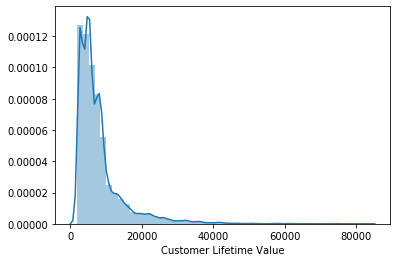

In [9]:
sns.distplot(data_num['Customer Lifetime Value'])

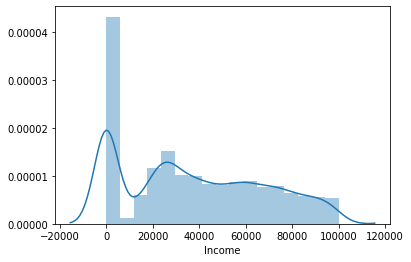

In [10]:
sns.distplot(data_num['Income'])

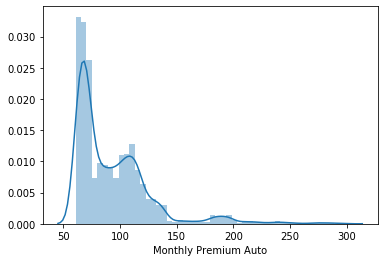

In [11]:
sns.distplot(data_num['Monthly Premium Auto'])

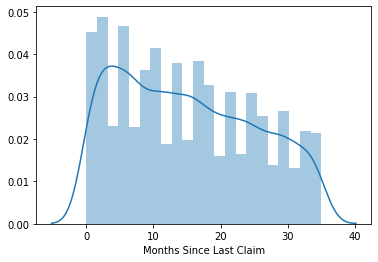

In [12]:
sns.distplot(data_num['Months Since Last Claim'])

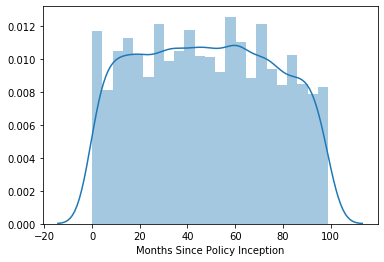

In [13]:
sns.distplot(data_num['Months Since Policy Inception'])

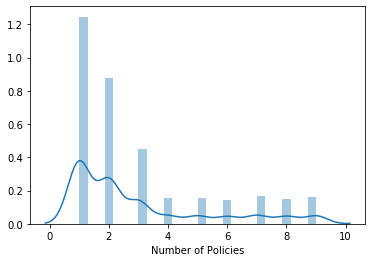

In [14]:
sns.distplot(data_num['Number of Policies'])

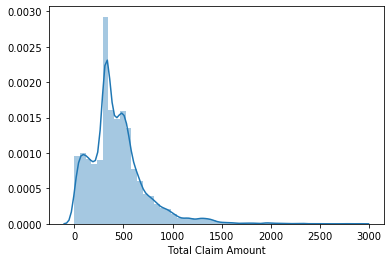

In [15]:
sns.distplot(data_num['Total Claim Amount'])

Q-Qplotforvariable: Customer Lifetime Value


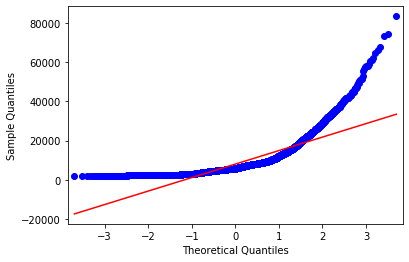

Q-Qplotforvariable: Income


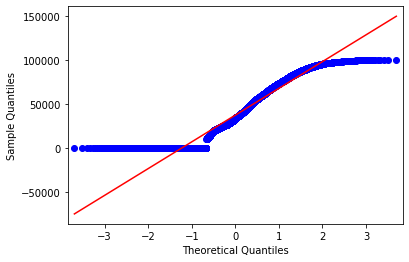

Q-Qplotforvariable: Monthly Premium Auto


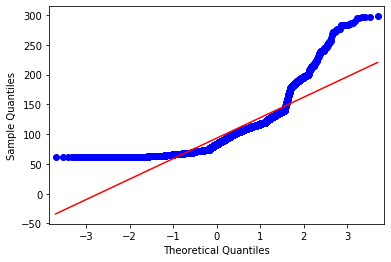

Q-Qplotforvariable: Months Since Last Claim


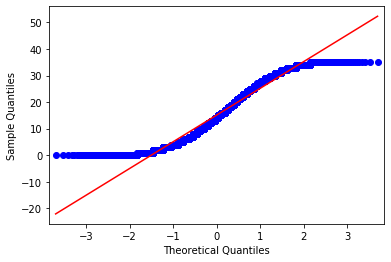

Q-Qplotforvariable: Months Since Policy Inception


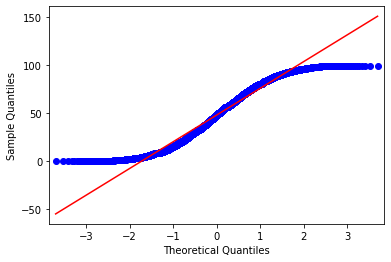

Q-Qplotforvariable: Number of Policies


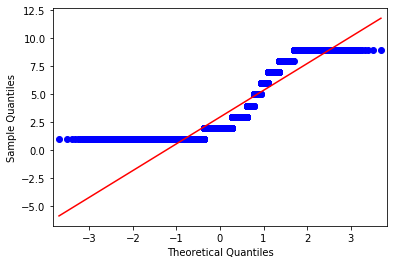

Q-Qplotforvariable: Total Claim Amount


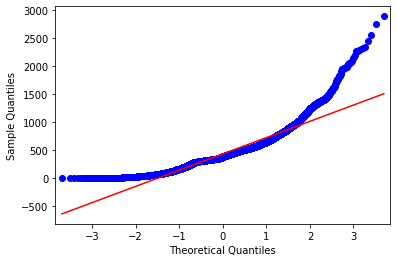

In [16]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
cols=list(data_num.columns)
for col in cols:
    print("Q-Qplotforvariable:",col)
    qqplot(data_num[col],line='s')
    pyplot.show()

### Check multicollinearity.

In [17]:
Pearson =data_num.corr()

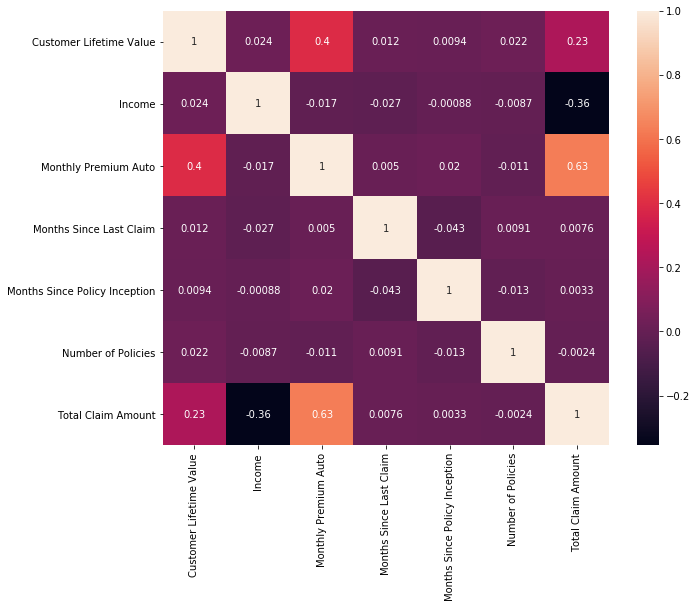

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(Pearson, annot=True)
plt.show()

In [23]:
#hapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data_num['Months Since Policy Inception'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.961, p=0.000
Sample does not look Gaussian (reject H0)
